In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('SOCR-HeightWeight.csv')
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [ ]:
df['Height(Inches)']=df['Height(Inches)'].astype(np.int64)
df['Weight(Pounds)']=df['Weight(Pounds)'].astype(np.int64)
# df.drop(columns=['Index'],inplace=True)
df.rename(columns={'Height(Inches)': 'Height','Weight(Pounds)': 'Weight'}, inplace=True)


KeyError: 'Height(Inches)'

Text(0, 0.5, 'Height')

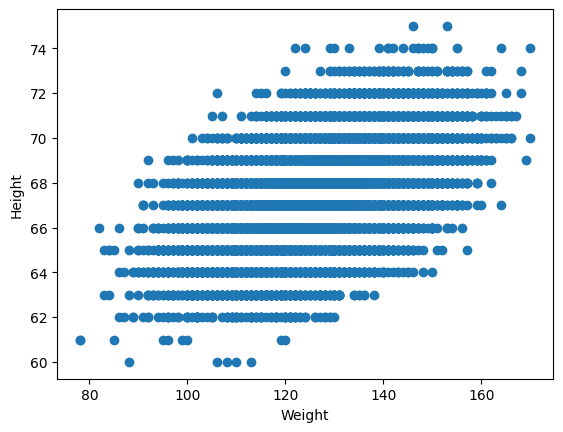

In [5]:
## scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [6]:
df.corr()

,Index,Height,Weight
Index,1.000000,0.007682,-0.00706
Height,0.007682,1.000000,0.49777
Weight,-0.007060,0.497770,1.00000


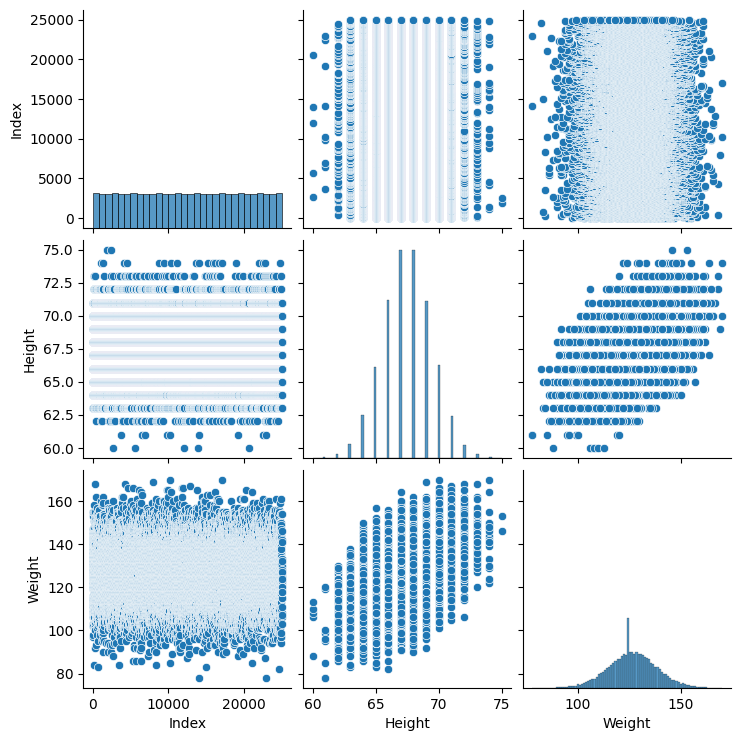

In [7]:
import seaborn as sns
sns.pairplot(df)

In [8]:
## Independent and Depenedent Feature
x=df[['Weight']] ### independent feature should be dataframe or two dimensional array
y=df['Height']  ## dependent feature can be series or one dimensional array


In [9]:
x_series = df['Weight']
np.array(x_series).shape

(25000,)

In [10]:
## Train test split
from sklearn.model_selection import train_test_split

In [11]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)


In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(18750, 1)
(6250, 1)
(18750,)
(6250, 1)


In [13]:
## standardization
from sklearn.preprocessing import StandardScaler


In [14]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [15]:
x_test = scaler.transform(x_test)

In [16]:
## Apply simple Linear Regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)

In [17]:
regression.fit(x_series,y)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [19]:
regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [20]:
regression.coef_

array([0.96210409])

In [21]:
regression.intercept_

np.float64(67.49514666666667)

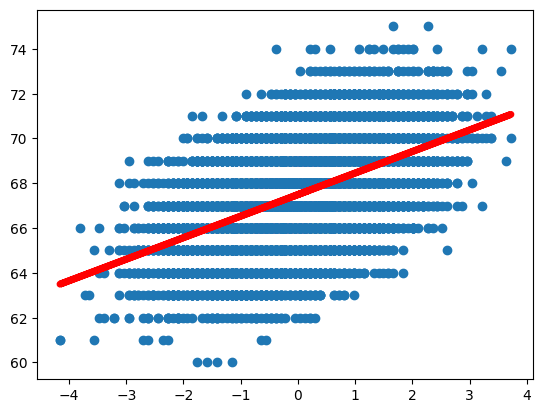

In [22]:
## plot Training data plot best fit line
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train),linewidth=5,color='red')

## Prediction for Test Data
- 1. predicted height output = intercept+coef_(Weights)

In [23]:
## prediction for test_data
y_predict =regression.predict(x_test)

In [24]:
## performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [25]:
mse = mean_squared_error(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2.6578335447762753
1.2928385370779318
1.6302863382781183


### R Square

Fromula

R^2 = 1- SSR/SST
R^2 = coefficient of determination 
SSR = sum of squares of residuals
SST = total sum of squares

In [26]:
from sklearn.metrics import r2_score

In [27]:
score = r2_score(y_test,y_predict)
print(score)

0.25097780359273203


## Adjusted R Square

Adjusted R^2 = 1-[(1-R2)*(n-1)/(n-k-1)]

n:number of observations
k:number of predictor variables

In [28]:
1-(1-score)*((len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

0.2508579216790945

In [29]:
## OLS linear regression
import statsmodels.api as sm

In [30]:
model = sm.OLS(y_train,x_train).fit()
prediciton = model.predict(x_test)
prediciton

array([ 0.94342924,  2.01428979,  0.28443814, ..., -1.03354408,
        1.68479424, -0.37455297], shape=(6250,))

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              3.807
Date:                Sun, 02 Mar 2025   Prob (F-statistic):                      0.0510
Time:                        14:27:17   Log-Likelihood:                     -1.0559e+05
No. Observations:               18750   AIC:                                  2.112e+05
Df Residuals:                   18749   BIC:                                  2.112e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9621      0.493      1.951      0.051      -0.004       1.929
==============================================================================
Omnibus:                        2.605   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.628
Skew:                          -0.026   Prob(JB):                        0.269
Kurtosis:                       2.974   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
regression.predict(scaler.transform([[72]]))

c:\Users\Ranjith\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([63.00189927])